Task 5

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("task_5.csv")

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


Exploratory Data Analysis

Checking the null values in Dataset

In [9]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Removing the columns which have more than 2500 null values

In [3]:
df.drop(["Fitness_of_casuality","Work_of_casuality","Defect_of_vehicle","Service_year_of_vehicle"],inplace=True,axis=1)

In [14]:
df.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

Finding the categorical column and fill values it with mode value

In [3]:
categorical=[i for i in df.columns if df[i].dtype=='O']
print("The categorical column in Dataframe:\n",categorical)

The categorical column in Dataframe:
 ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [4]:
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [23]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [28]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [27]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316.000000,12316.000000,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,14,...,NaN,NaN,13,4,3,6,4,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Other,...,NaN,NaN,Going straight,Driver or rider,Male,na,3,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,8360,10206,4192,4155,10941,4058,...,NaN,NaN,8466,4944,5253,4443,7076,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

Data Visualization

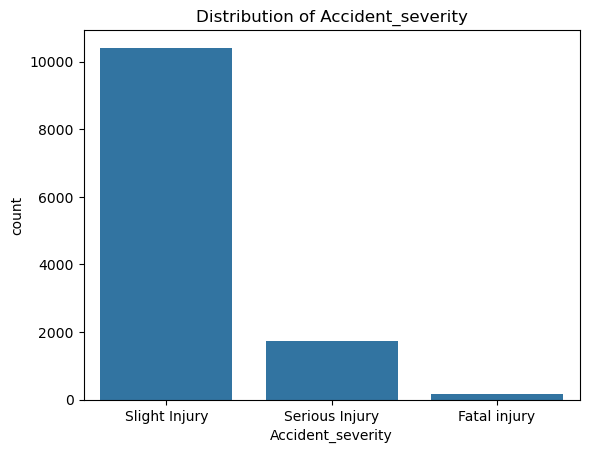

In [30]:
sb.countplot(x=df["Accident_severity"])
plt.title("Distribution of Accident_severity")
plt.show()

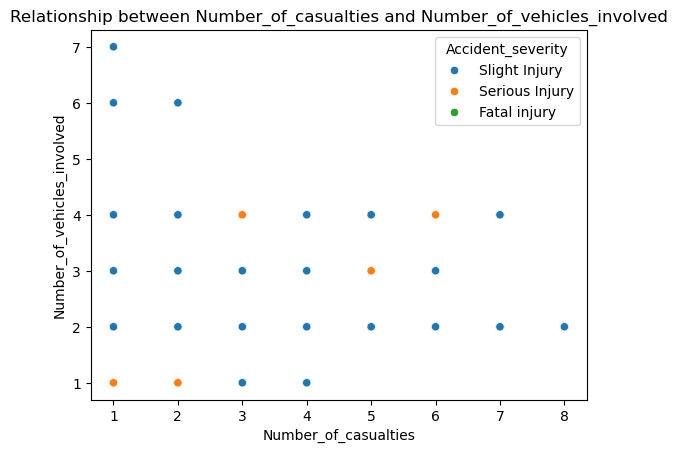

In [31]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sb.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
plt.title("Relationship between Number_of_casualties and Number_of_vehicles_involved")
plt.show()

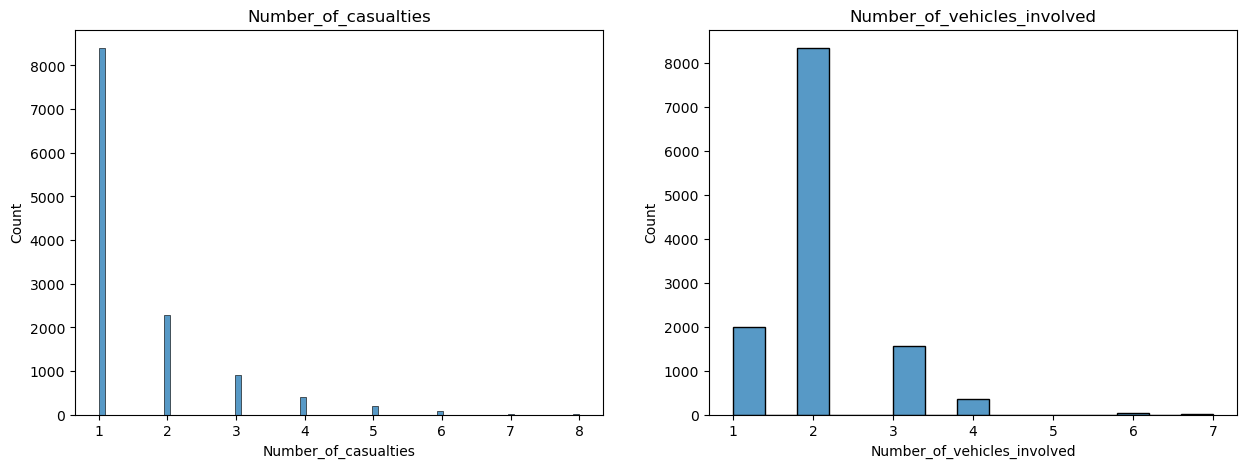

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(df["Number_of_casualties"],ax=ax[0])
ax[0].set_title("Number_of_casualties")
sb.histplot(df["Number_of_vehicles_involved"],ax=ax[1])
ax[1].set_title("Number_of_vehicles_involved")
plt.show()

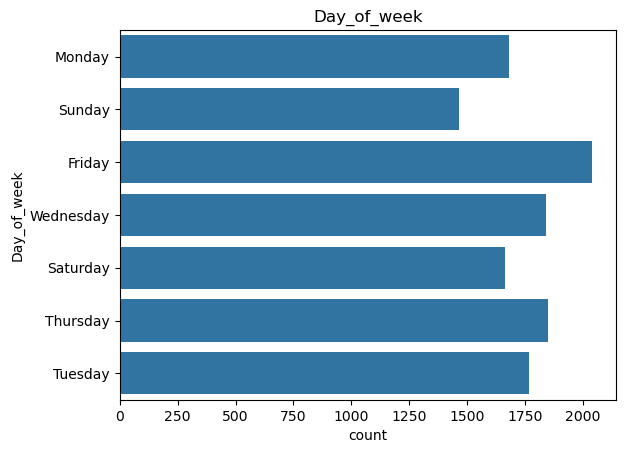

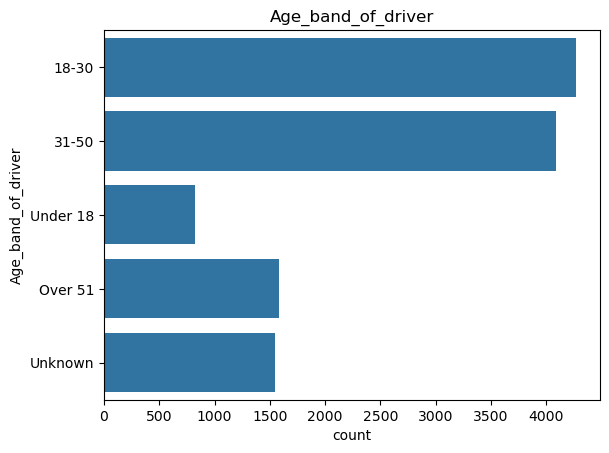

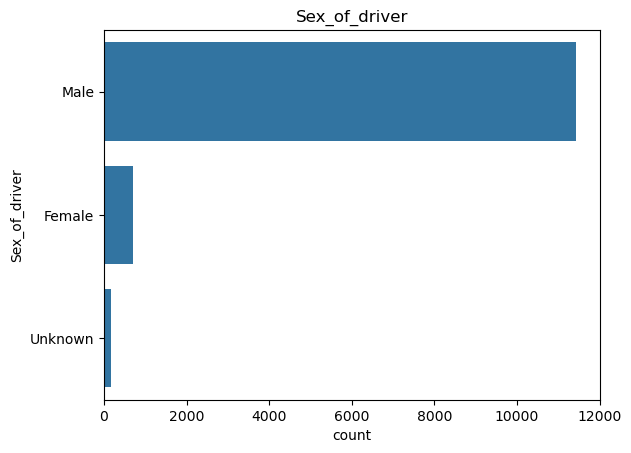

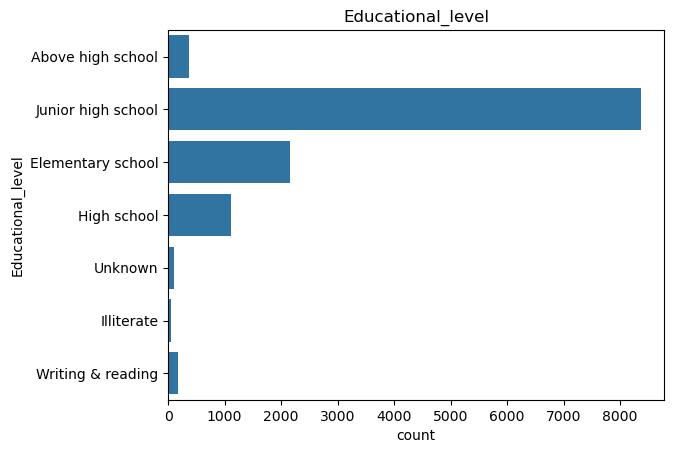

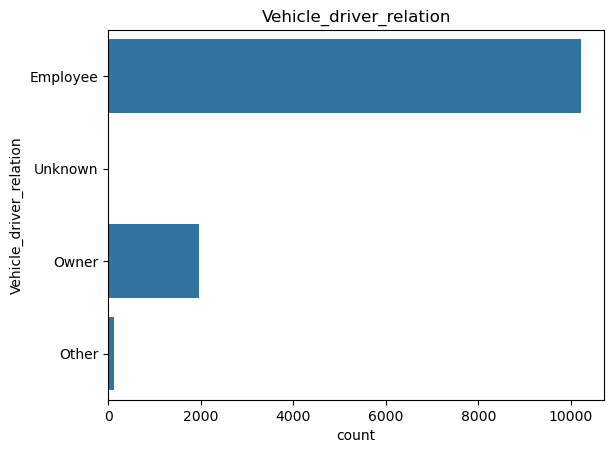

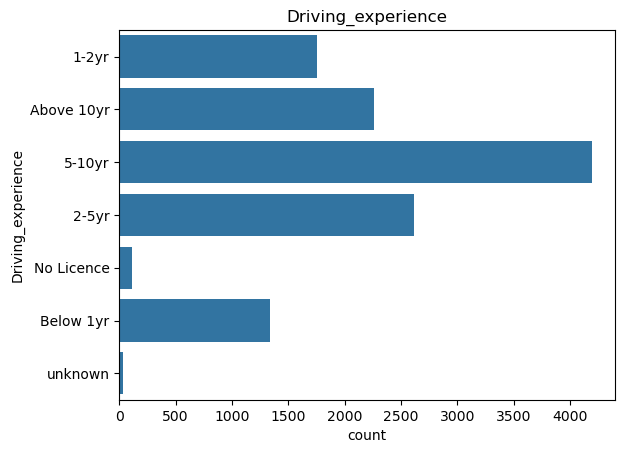

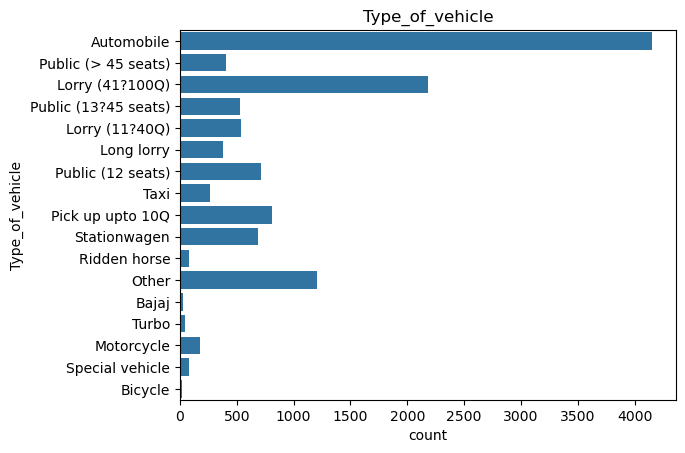

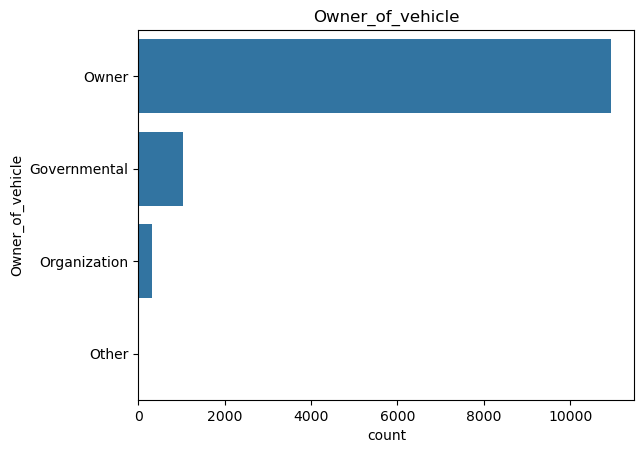

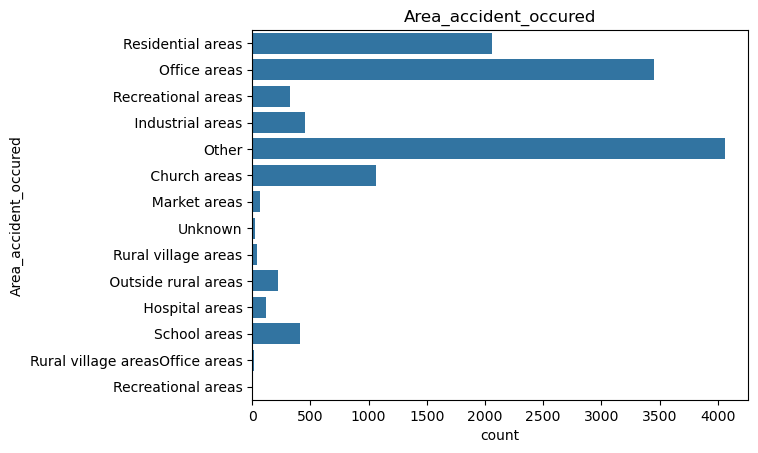

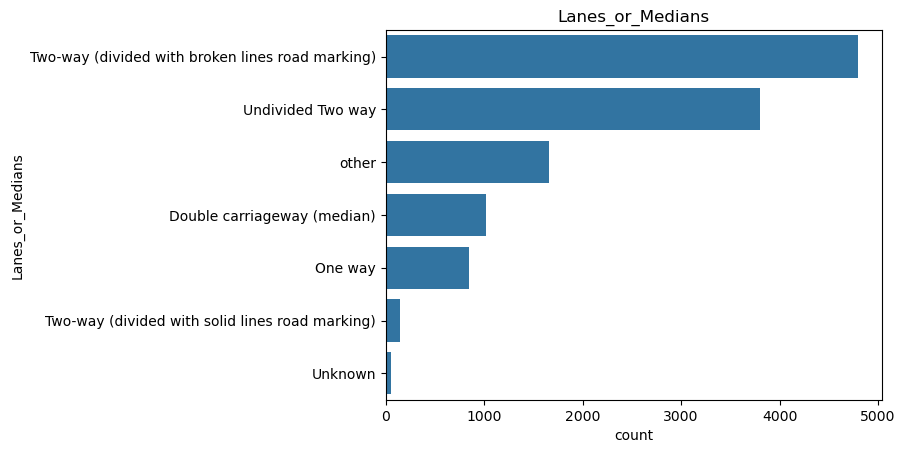

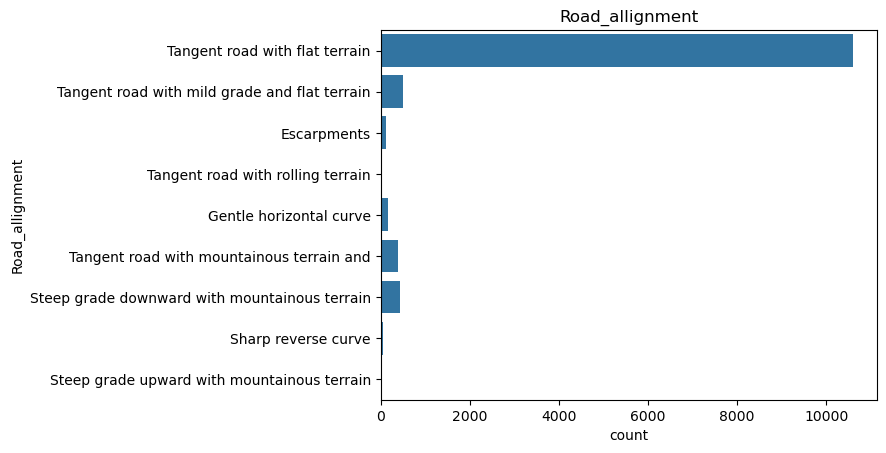

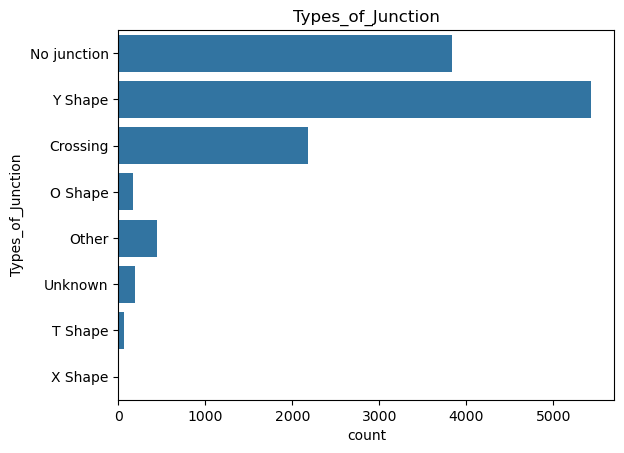

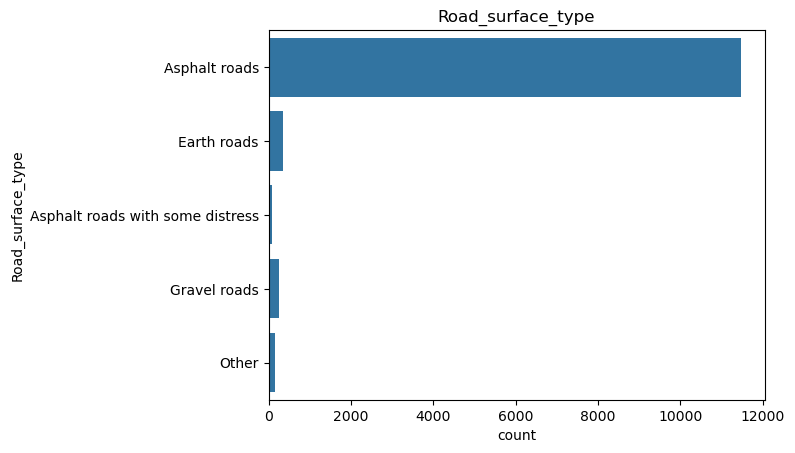

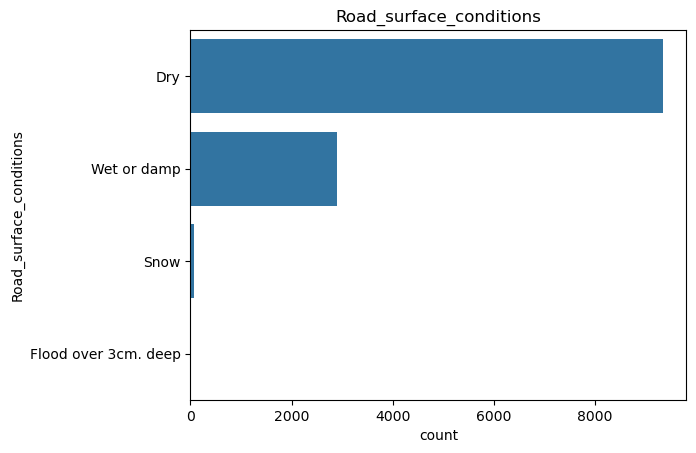

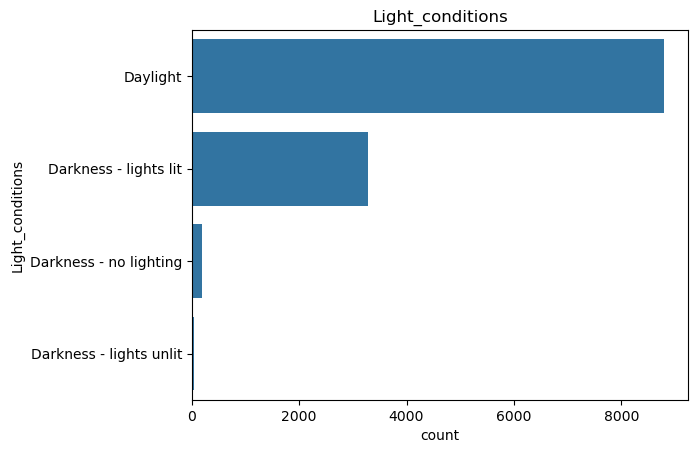

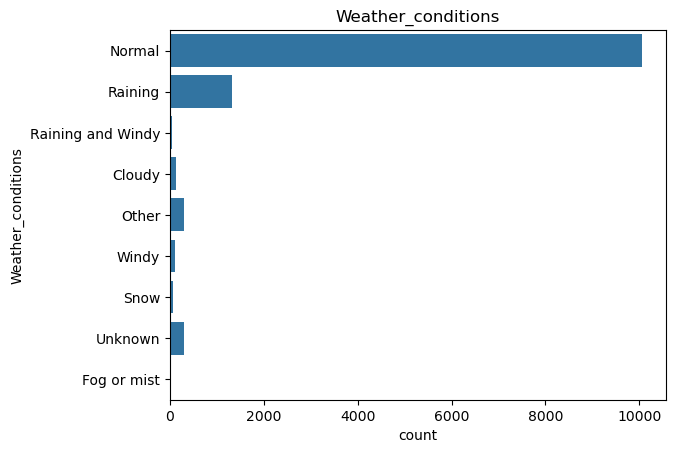

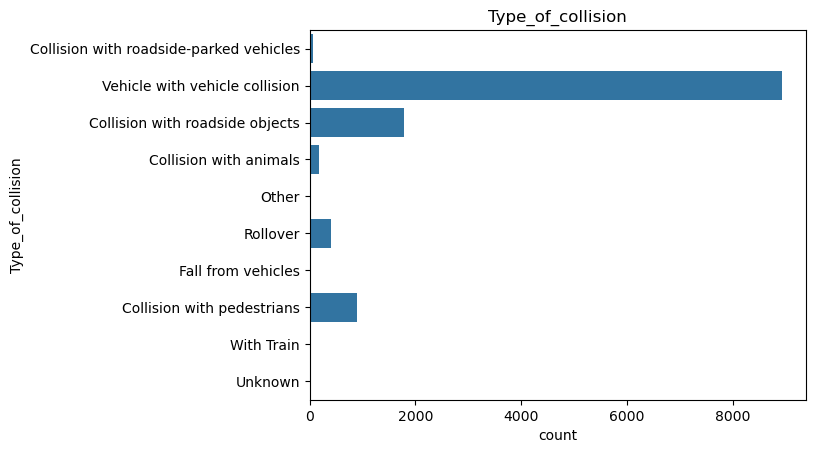

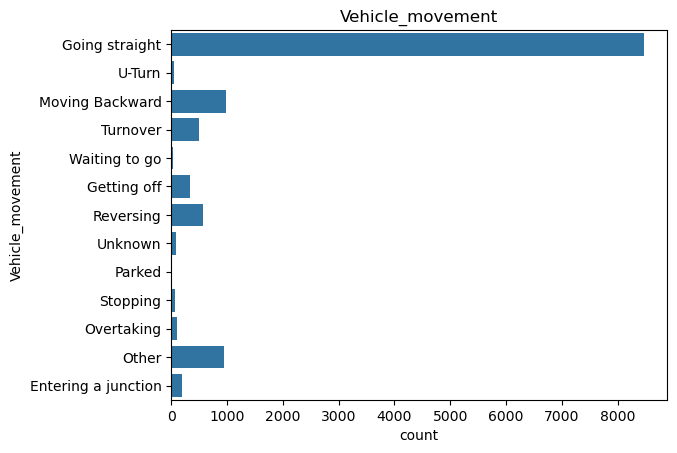

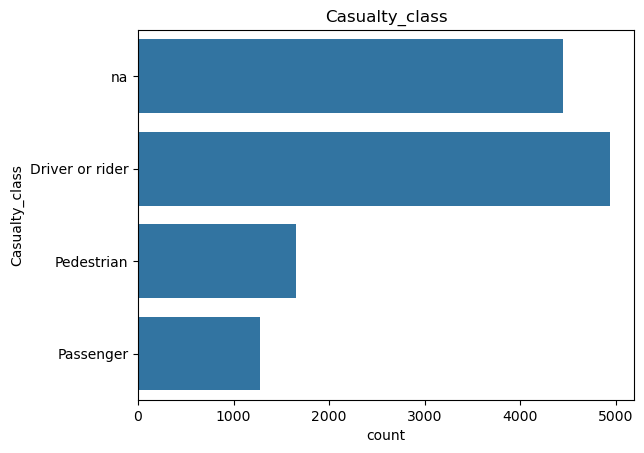

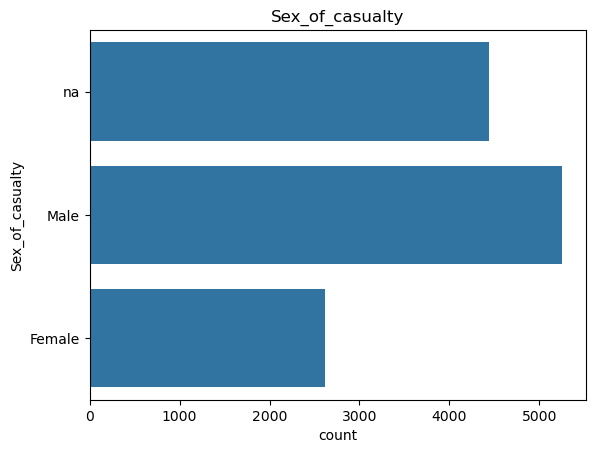

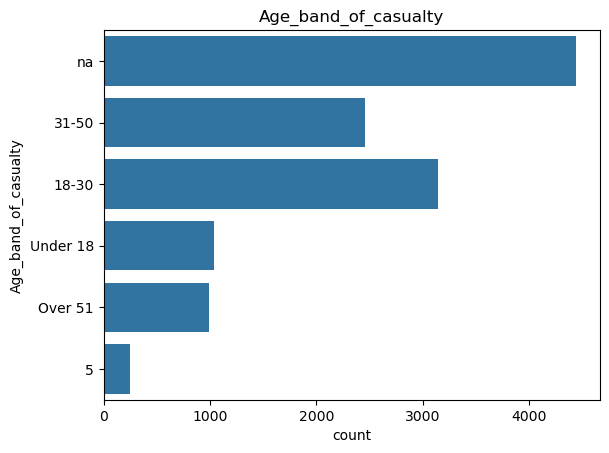

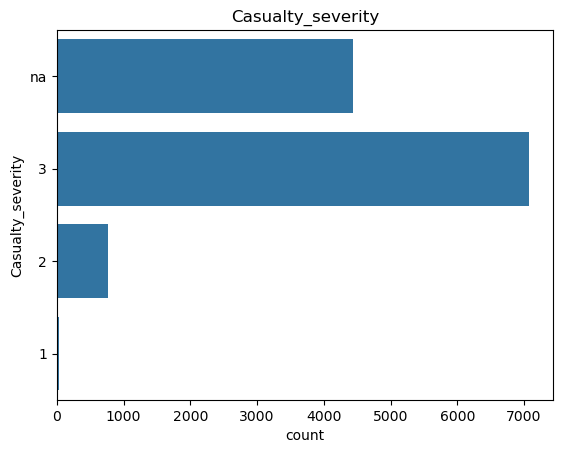

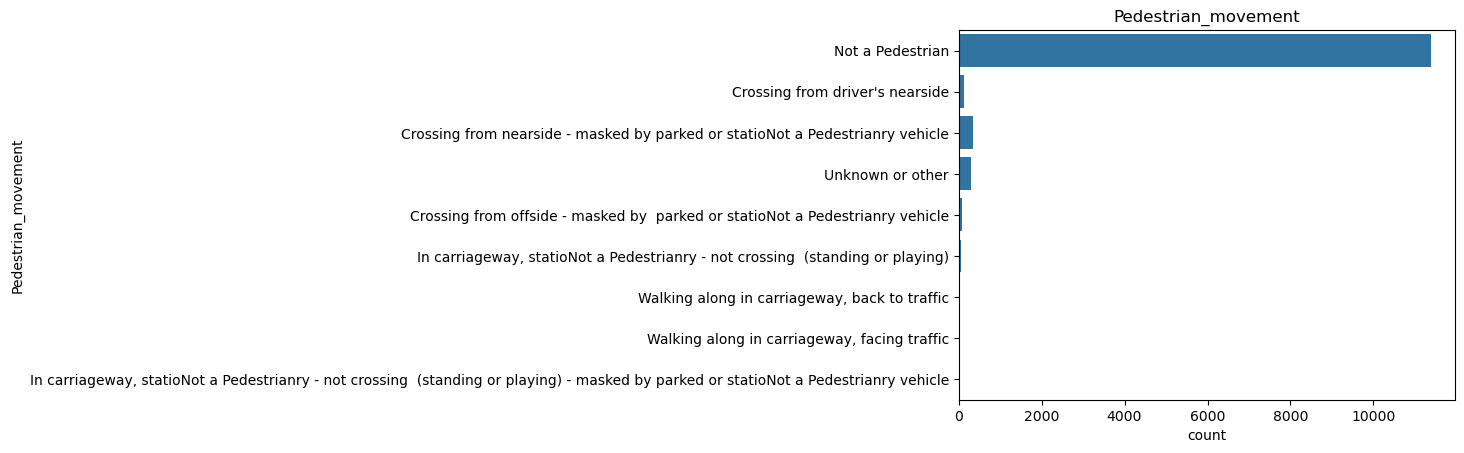

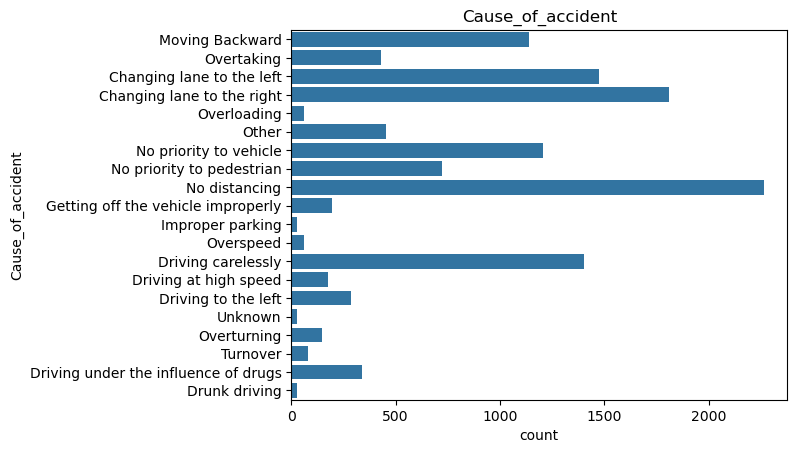

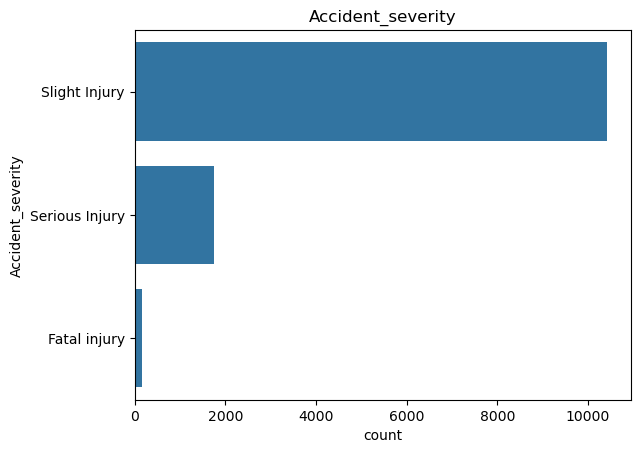

In [44]:
for i in range(1,len(categorical)):
    sb.countplot(df[categorical[i]])
    plt.title(categorical[i])
    plt.show()

In [11]:
encoded_data=pd.get_dummies(df)

In [6]:
#Correlation
corr=encoded_data.corr()

<Axes: >

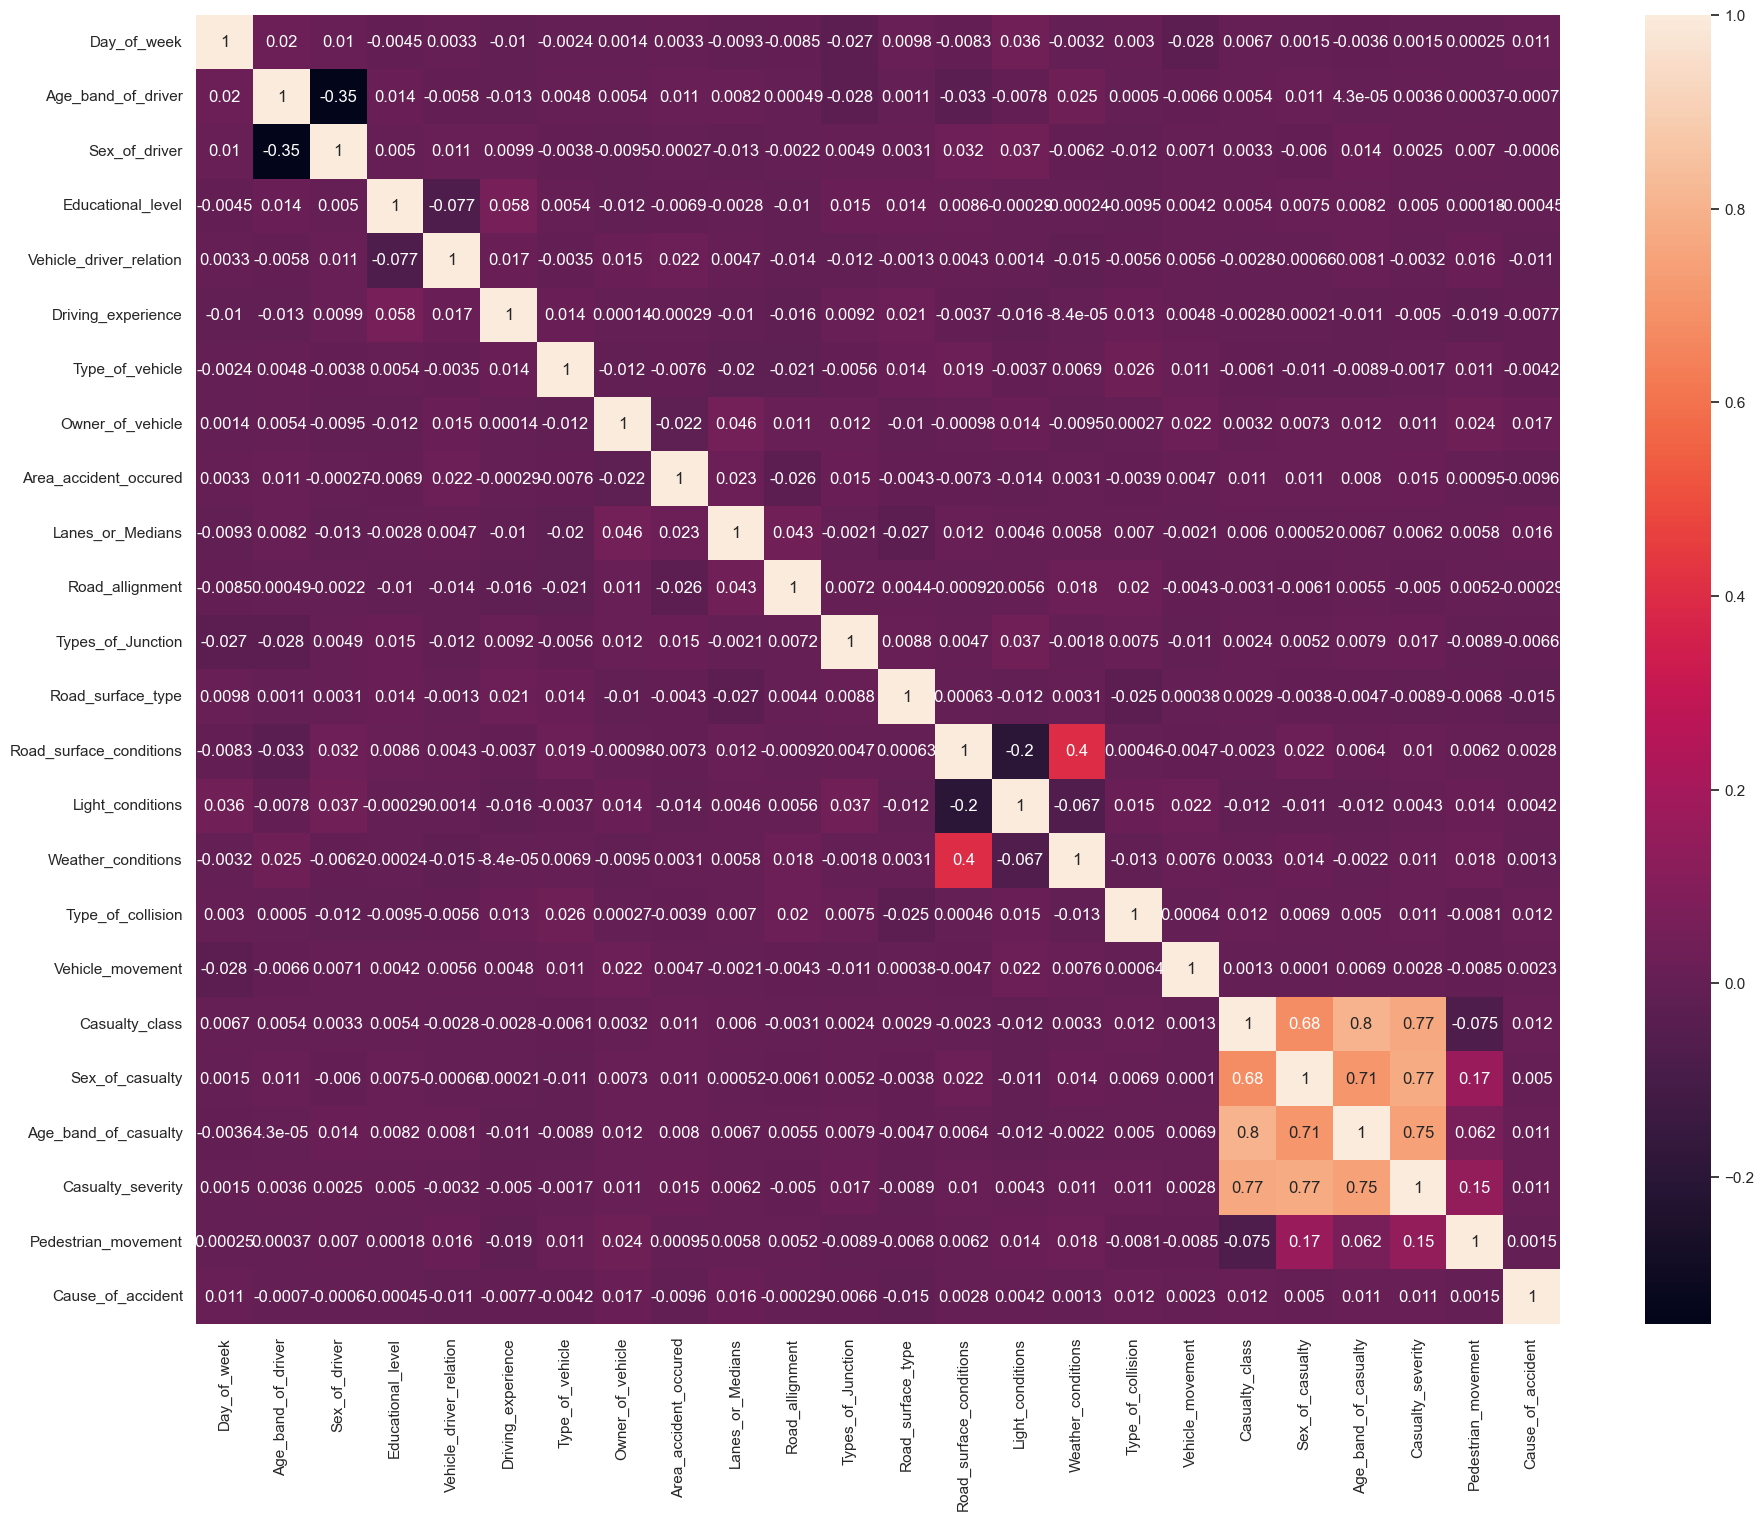

In [43]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True)

Feature and Target

In [112]:
X=pd.get_dummies(df.drop(["Time","Day_of_week","Owner_of_vehicle","Vehicle_driver_relation","Pedestrian_movement","Accident_severity","Road_surface_type","Road_surface_conditions","Road_allignment","Lanes_or_Medians","Types_of_Junction","Area_accident_occured","Educational_level","Sex_of_driver"],axis=1))

In [73]:
y=df["Accident_severity"]

Splitting Into Train data and Test data

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

KNN Classifier

Creating the model

In [114]:
KNN_model=KNeighborsClassifier(n_neighbors=5)

Training the model with train data

In [115]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred=KNN_model.predict(X_test)

In [117]:
#Accuracy Score
print("Accuracy Score of KKN_model:",accuracy_score(y_test,y_pred))

Accuracy Score of KKN_model: 0.8252679441377071


In [118]:
#Classification Report
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.20      0.02      0.04        46
Serious Injury       0.33      0.06      0.10       463
 Slight Injury       0.84      0.98      0.90      2570

      accuracy                           0.83      3079
     macro avg       0.46      0.35      0.35      3079
  weighted avg       0.75      0.83      0.77      3079



In [ ]:
Logistic Regression

Creating the model

In [119]:
LR_model=LogisticRegression()

In [120]:
LR_model.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred=LR_model.predict(X_test)

In [122]:
#Accuracy Score
print("Accuracy Score of Logistic Regression model:",accuracy_score(y_test,y_pred))

Accuracy Score of Logistic Regression model: 0.834686586554076


In [123]:
#Classification Report
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        46
Serious Injury       0.00      0.00      0.00       463
 Slight Injury       0.83      1.00      0.91      2570

      accuracy                           0.83      3079
     macro avg       0.28      0.33      0.30      3079
  weighted avg       0.70      0.83      0.76      3079

